# Lab 5 : Keras In class
- See https://keras.io
- Name1, Student's ID1

Name your file to Inclass5_59_34xx_.ipynb




## Lab Instruction 

In this lab, you will learn to create a simple fully-connect neural network using Keras library with Tensorflow backend. We will play with MNIST data which is a Keras build-in dataset. 
and this lab has In class Discussion to answer

See http://yann.lecun.com/exdb/mnist/ for data description.

First, import all the library that we will use in this lab

In [ ]:
from keras.datasets import mnist

### Load Data ###

#################

In [ ]:
import keras
keras.__version__

'2.6.0'

## 1. Dataset

We will use a build-in data 'MNIST' which is a handwritten digit number image from 0 to 9

In [ ]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

### Learn About the Data

Understand your data. For example, its shape, format, datatype, structure, distribution, data classes, etc.

### Type of dataset for this 
use %type( variable ) to see type of dataset

In [ ]:
print('Feature type: %s'%type(train_images))
print('Label type: %s'%type(train_labels))

Feature type: <class 'numpy.ndarray'>
Label type: <class 'numpy.ndarray'>


### Type of value in the dataset

In [ ]:
print('Feature data type: %s'%train_images.dtype)
print('Label data type: %s'%train_labels.dtype)

Feature data type: uint8
Label data type: uint8


### Shape

In [ ]:
print('Train_set Feature shape: %s'%str(train_images.shape))
print('Train_set Label type: %s'%str(train_labels.shape))
print('Test_set Feature shape: %s'%str(test_images.shape))
print('Test_set Label type: %s'%str(test_labels.shape))

Train_set Feature shape: (60000, 28, 28)
Train_set Label type: (60000,)
Test_set Feature shape: (10000, 28, 28)
Test_set Label type: (10000,)


### Dimension

In [ ]:
print('Train_set Feature dimension: %s'%str(train_images.ndim))
print('Train_set Label dimension: %s'%str(train_labels.ndim))
print('Test_set Feature dimension: %s'%str(test_images.ndim))
print('Test_set Label dimension: %s'%str(test_labels.ndim))

Train_set Feature dimension: 3
Train_set Label dimension: 1
Test_set Feature dimension: 3
Test_set Label dimension: 1


### Characteristic of data 

In [ ]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

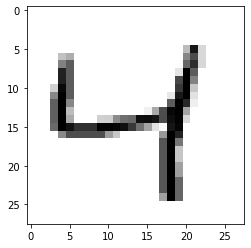

In [ ]:
digit = train_images[2]

import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(digit, cmap=plt.cm.binary)

In [ ]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

## 2. Create a fully-connect neural network model


Build a two-layer neural network  using `Sequential()`
( See https://keras.io/models/sequential ) 
> INPUT -> LINEAR -> RELU -> LINEAR -> softmax

with the hidden layer of size 512

See Keras Model: https://keras.io/models/about-keras-models/

In [ ]:
from keras import models
from keras import layers

In [ ]:
network = models.Sequential()
network.add(layers.Dense(512, activation='relu',input_shape=(28*28,)))
network.add(layers.Dense(10, activation='softmax'))

Compile your model with the following argument.

```
optimizer='sgd',
loss='categorical_crossentropy',
metrics=['accuracy']
```

In [ ]:
network.compile(optimizer='sgd',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

Let's see how our model looklike using `.summary()`



In [ ]:
network.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


## 3. Preprocessing Data


- Reshape the features data (flattern) and normalize the value to be between 0 and 1
- One-hot the target data

In [ ]:
train_images = train_images.reshape(60000,28*28) # Reshape
train_images = train_images.astype('float32')/255 # Normalize

test_images = test_images.reshape(10000,28*28) # Reshape
test_images = test_images.astype('float32')/255 # Normalize

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [ ]:
test_labels

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
test_labels.shape

(10000, 10)

## 4. Train Model

Use `.fit()` to train your neural network model and return the record of accuracy and loss value in each epoch

We will train model with 10 epoch (If you confident with your computer performance, you can trian model with more epoch.)

We will train with mini-batch method with each the batch size equal to 128 data.



This process will take about a minute.

To prevent an information leak to test set, which casue an overfit, we will split the data to train set, test set, and validation set. Doing so, we will split the training data into 90% train set and 10% validation set.

Since keras `validation_split` argument split the last 10% of data to be validation set, the target class may not be equally distributed in validation set. Thus, we have to use `train_test_split`  from sklearn to split the data into train set and validation set. 


In [ ]:
history = network.fit(train_images,train_labels,epochs=10,validation_split=0.1,batch_size=128)

Epoch 1/10
329/329 [==============================] - 3s 6ms/step - loss: 1.2746 - accuracy: 0.7148 - val_loss: 0.7397 - val_accuracy: 0.8442
Epoch 2/10
329/329 [==============================] - 2s 5ms/step - loss: 0.6219 - accuracy: 0.8565 - val_loss: 0.5129 - val_accuracy: 0.8769
Epoch 3/10
329/329 [==============================] - 1s 4ms/step - loss: 0.4831 - accuracy: 0.8800 - val_loss: 0.4326 - val_accuracy: 0.8897
Epoch 4/10
329/329 [==============================] - 1s 4ms/step - loss: 0.4221 - accuracy: 0.8903 - val_loss: 0.3913 - val_accuracy: 0.8962
Epoch 5/10
329/329 [==============================] - 2s 5ms/step - loss: 0.3861 - accuracy: 0.8969 - val_loss: 0.3675 - val_accuracy: 0.8997
Epoch 6/10
329/329 [==============================] - 1s 4ms/step - loss: 0.3617 - accuracy: 0.9020 - val_loss: 0.3465 - val_accuracy: 0.9044
Epoch 7/10
329/329 [==============================] - 1s 4ms/step - loss: 0.3432 - accuracy: 0.9057 - val_loss: 0.3312 - val_accuracy: 0.9091
Epoch 

We will plot the loss and accuracy of both train set and validate set over iteration.

---

In [ ]:
import  matplotlib.pyplot  as plt
%matplotlib inline

In [ ]:
# The function argument is a record or history of the model during training process.
def plot_loss_fn(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(loss) + 1)

    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
def plot_acc_fn(history):

    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    
    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

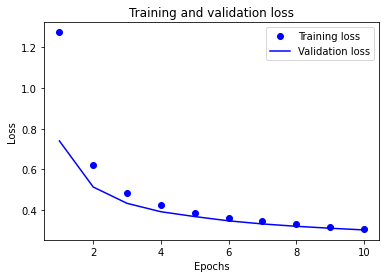

In [ ]:
plot_loss_fn(history)

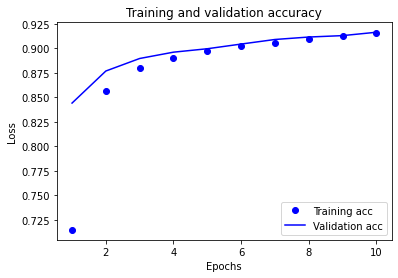

In [ ]:
plot_acc_fn(history)

## 5. Evaluate Model

Evaluate your model with test set using `.evaluate()` and compare the result with the training set and validate set. 

In [ ]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('Test Loss: %s\nTest Accuracy: %s' % (test_loss,test_acc))

313/313 [==============================] - 1s 3ms/step - loss: 0.2886 - accuracy: 0.9207
Test Loss: 0.288614958524704
Test Accuracy: 0.9207000136375427


In [ ]:
history.history

{'accuracy': [0.7147856950759888,
  0.8565000295639038,
  0.880047619342804,
  0.8902857303619385,
  0.8968809247016907,
  0.9020000100135803,
  0.9056666493415833,
  0.909428596496582,
  0.9122142791748047,
  0.9154999852180481],
 'loss': [1.2745580673217773,
  0.6219465732574463,
  0.48306411504745483,
  0.4220673441886902,
  0.38605445623397827,
  0.3616533577442169,
  0.34319522976875305,
  0.3285731375217438,
  0.31639647483825684,
  0.30579689145088196],
 'val_accuracy': [0.8442222476005554,
  0.8769444227218628,
  0.8897222280502319,
  0.8961666822433472,
  0.8996666669845581,
  0.9044444561004639,
  0.9091110825538635,
  0.9116111397743225,
  0.9130555391311646,
  0.9164999723434448],
 'val_loss': [0.7396512627601624,
  0.5129213333129883,
  0.4325603246688843,
  0.39129161834716797,
  0.3674662411212921,
  0.3464730978012085,
  0.33124983310699463,
  0.3196028769016266,
  0.3100738525390625,
  0.30174192786216736]}

### 6. Model tuning

Try to tune your model by: 
1.  Change your the model structure by adding more hidden layer with any number of node and see how it affect your model.
2. Try Increasing epoch and see how it affect your model? Does the result better or it get overfit?

### 7. Discussion and Result
Q :Write down your analysis from previous step

**ANSWER**